# imports 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data = pd.read_csv("csv_files/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Create an empty dictionary to store unique values for each column
uniques_dict = {}

# Iterate over each column in the DataFrame
for col in data.columns:
    # Get unique values in the current column and add them to the dictionary
    uniques_dict[col] = len(data[col].unique())

# Print the dictionary containing unique values for each column
print(uniques_dict)

{'PassengerId': 891, 'Survived': 2, 'Pclass': 3, 'Name': 891, 'Sex': 2, 'Age': 89, 'SibSp': 7, 'Parch': 7, 'Ticket': 681, 'Fare': 248, 'Cabin': 148, 'Embarked': 4}


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

Drop all Non-Numeric features and Irrelevant Fields

In [6]:
cat_features = ['Name','PassengerId','Ticket','Sex','Embarked','Cabin']
data.drop(cat_features, axis = 1, inplace=True)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.groupby(data['Survived']).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [9]:
data.groupby(data['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Visualizations:

#### Plot continuous features

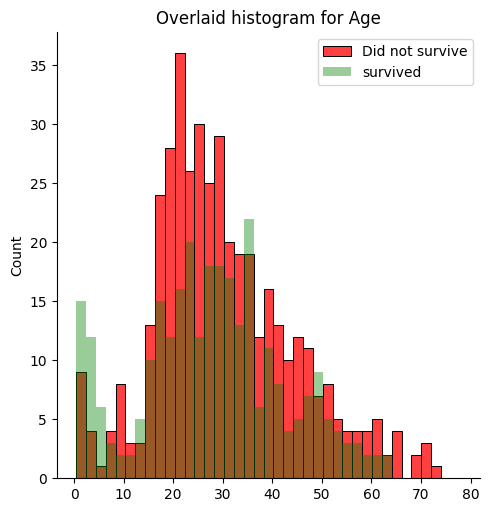

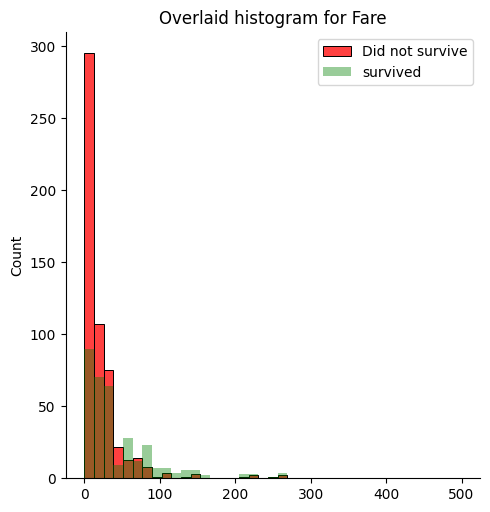

In [10]:
for i in ['Age','Fare']:
    died = list(data[data['Survived'] == 0][i].dropna())
    survived = list(data[data['Survived'] == 1][i].dropna())
    xmin = min (min(died), min(survived))
    xmax = max (max(died), max(survived))
    width = (xmax-xmin) / 40
    sns.displot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde = False, bins=np.arange(xmin, xmax, width))
    plt.legend(["Did not survive", "survived"])
    plt.title("Overlaid histogram for {}".format(i))
    plt.show()


<Figure size 640x480 with 0 Axes>

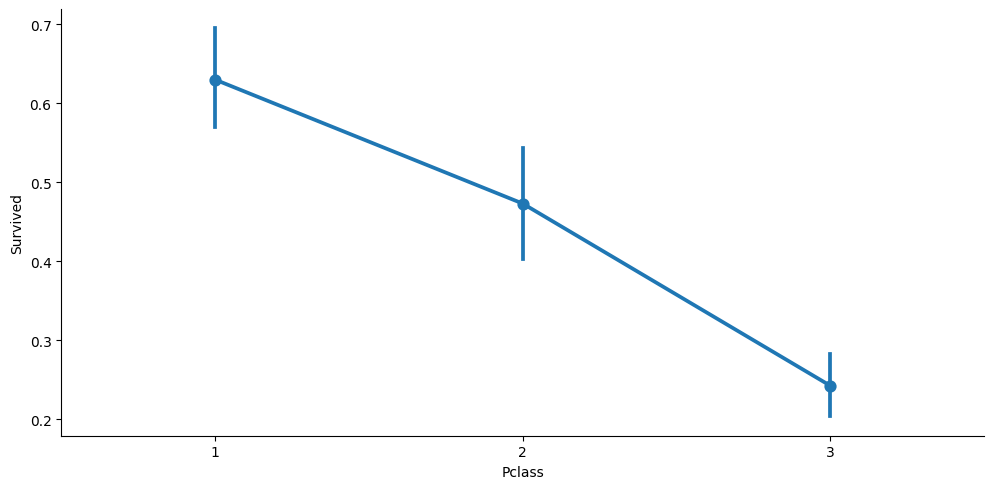

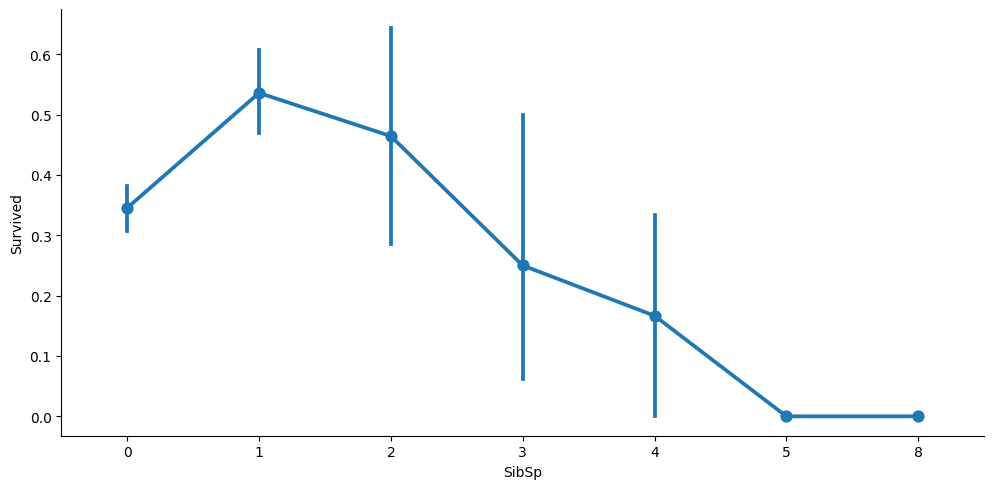

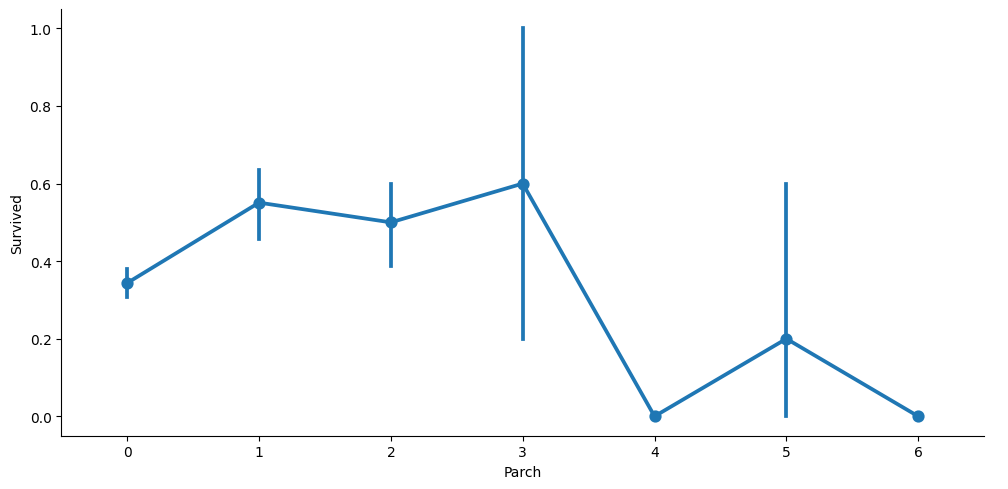

In [11]:
for i, col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=data, kind='point',aspect=2)

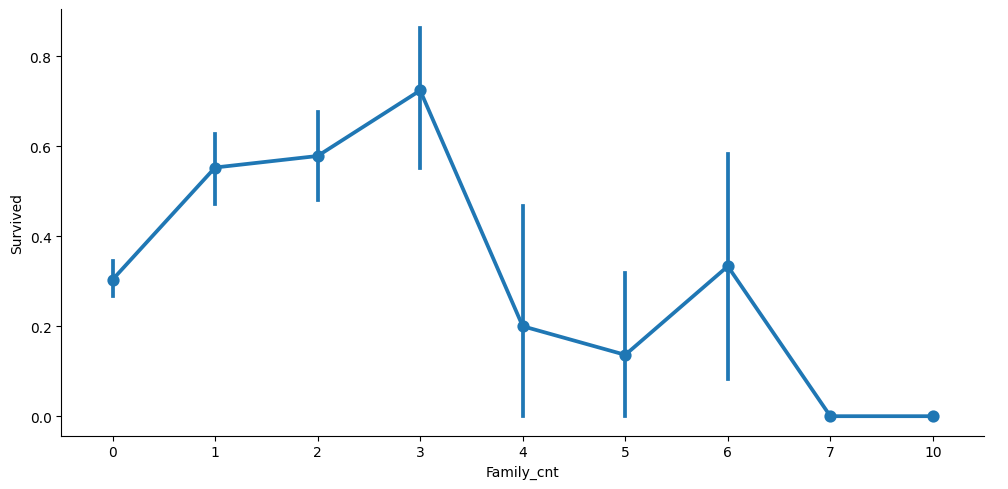

In [12]:
data['Family_cnt'] = data['SibSp']+data['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=data, kind='point',aspect=2)

Now go ahead and drop the SibSp and Parch columns 

In [13]:
data.drop(['SibSp','Parch'], axis=1, inplace=True)

Dealing with missing values in Age Feature

In [14]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Family_cnt    0
dtype: int64

In [25]:
cont_features = ['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
data = pd.read_csv("csv_files/train.csv")
cat_features = data.drop(cont_features, axis=1)
cat_features.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [26]:
cat_features.groupby(cat_features['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [27]:
cat_features['Cabin_ind'] = np.where(cat_features['Cabin'].isnull(), 0, 1)
cat_features.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


Categorical Variables Visualizations

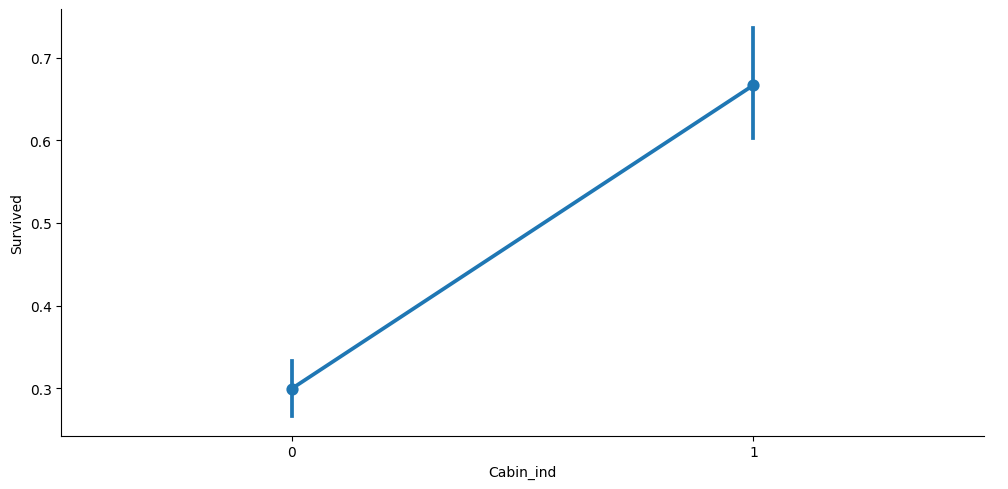

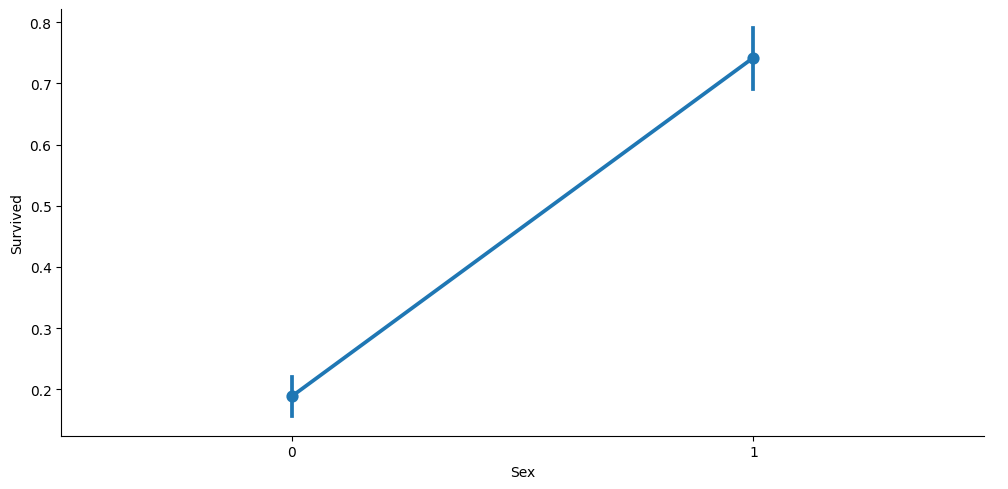

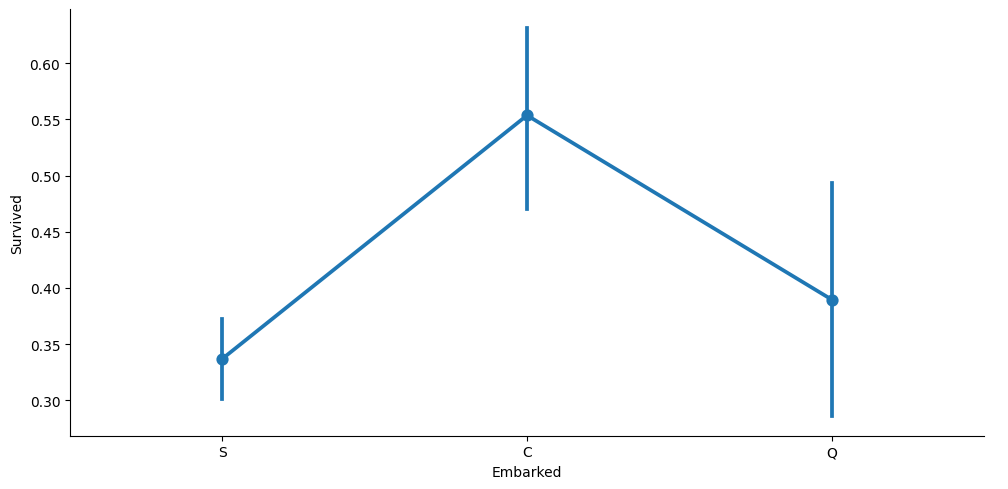

In [48]:
for i, col in enumerate(['Cabin_ind', 'Sex','Embarked']):
    sns.catplot(x=col, y='Survived', data=data, kind='point', aspect=2,)

In [ ]:
data.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [ ]:
data.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


Drop irrelevant fields in dataset

In [ ]:
data.drop(['Ticket','Embarked'], axis = 1, inplace=True)

convert sex to numeric

In [ ]:
gender_num = {'male' : 0, 'female' : 1}
data['Sex'] = data['Sex'].map(gender_num)
data.head()

,Survived,Sex,Cabin,Cabin_ind
0,0,0,NaN,0
1,1,1,C85,1
2,1,1,NaN,0
3,1,1,C123,1
4,0,0,NaN,0


In [44]:
data = pd.read_csv('csv_files/train.csv')
data.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Create Cabin Indicator

In [45]:
data['Cabin_ind'] = np.where(data['Cabin'].isnull(), 0,1)
data.drop('Cabin', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_ind
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


#### Convert sex to numeric

In [46]:
gender_num = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(gender_num)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_ind
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [47]:
data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
SibSp          0
Parch          0
Fare           0
Embarked       2
Cabin_ind      0
dtype: int64

### Drop Embarked Since it is not a relevant column in the dataset:

In [36]:
data.drop(['Cabin','Embarked'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


## Putting Everything Together:

In [100]:
data = pd.read_csv('csv_files/train.csv')

convert sex to numeric, create cabin indicator, replace Nan values in Age with the mean and drop cabin, merge Sib and ___ as family count.

In [101]:
data['Cabin_ind'] = np.where(data['Cabin'].isnull(), 0, 1)
# Check if 'Sex' has NaNs or if it has been mapped previously
if data['Sex'].dtype != 'int64':
    data['Sex'] = data['Sex'].map(gender_num, na_action='ignore')  # Avoids NaNs on repeated runs
data['Family_cnt'] = data['SibSp']+data['Parch']
# Fill NaN values in 'Age' with the mean age
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


Drop all irrelevant columns in this dataframe:

In [102]:
data.drop(['PassengerId','SibSp','Parch', 'Ticket', 'Embarked','Name', 'Cabin'], axis=1, inplace=True)
data.head(3)

,Survived,Pclass,Sex,Age,Fare,Cabin_ind,Family_cnt
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0


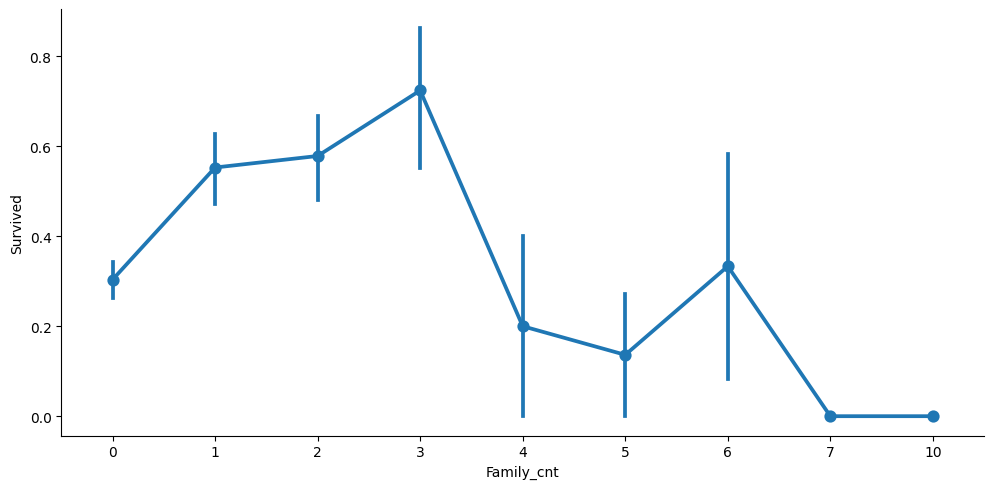

In [103]:
sns.catplot(x='Family_cnt', y='Survived', data=data, kind='point',aspect=2)


In [104]:
from sklearn.model_selection import train_test_split
features = data.drop('Survived', axis=1)
labels = data['Survived']
features.head()

,Pclass,Sex,Age,Fare,Cabin_ind,Family_cnt
0,3,0,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,0,0
3,1,1,35.0,53.1000,1,1
4,3,0,35.0,8.0500,0,0


In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

In [106]:
print(len(labels), len(y_train), len(y_val), len(y_test))

891 534 179 178


Write out the cleaned dataset

In [107]:
data.to_csv('csv_files/titanic_cleaned.csv')

In [112]:
titanic = pd.read_csv('csv_files/titanic_cleaned.csv')

features = data.drop('Survived', axis=1)
labels = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

X_train.to_csv("csv_files/train_features.csv", index=False)
X_test.to_csv("csv_files/test_features.csv", index=False)
X_val.to_csv("csv_files/val_features.csv", index=False)

y_test.to_csv("csv_files/test_labels.csv", index=False)
y_train.to_csv("csv_files/train_labels.csv", index=False)
y_val.to_csv("csv_files/val_labels.csv", index=False)

Fit a Basic Model Using Cross Validation:

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

rf = RandomForestClassifier()
tr_features = pd.read_csv('csv_files/train_features.csv')
tr_labels = pd.read_csv('csv_files/train_labels.csv')
scores = cross_val_score(rf, tr_features, tr_labels, cv=5)
scores

array([0.82242991, 0.81308411, 0.79439252, 0.80373832, 0.83018868])

In [120]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']


    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [123]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
parameters = {'n_estimators': [5, 50, 100],
              'max_depth': [2, 10, 20, None]
              }

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels)

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.777 (+/-0.147) for {'max_depth': 2, 'n_estimators': 5}
0.792 (+/-0.107) for {'max_depth': 2, 'n_estimators': 50}
0.79 (+/-0.129) for {'max_depth': 2, 'n_estimators': 100}
0.792 (+/-0.074) for {'max_depth': 10, 'n_estimators': 5}
0.826 (+/-0.049) for {'max_depth': 10, 'n_estimators': 50}
0.822 (+/-0.063) for {'max_depth': 10, 'n_estimators': 100}
0.803 (+/-0.05) for {'max_depth': 20, 'n_estimators': 5}
0.813 (+/-0.033) for {'max_depth': 20, 'n_estimators': 50}
0.811 (+/-0.022) for {'max_depth': 20, 'n_estimators': 100}
0.8 (+/-0.068) for {'max_depth': None, 'n_estimators': 5}
0.811 (+/-0.036) for {'max_depth': None, 'n_estimators': 50}
0.817 (+/-0.038) for {'max_depth': None, 'n_estimators': 100}
